Description of Project . It contains 495 entrepreneurs making their pitch to the VC sharks
-- Advait Bhatt
Import all required packages

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob

In [2]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
from nltk.util import ngrams
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

from gensim.models import Word2Vec
 
from nltk.cluster import KMeansClusterer
import nltk
 
from sklearn import cluster
from sklearn import metrics

import datetime

from sklearn.decomposition import PCA
from matplotlib import pyplot


[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


#Read Files required

In [3]:
sharkdata=pd.read_csv("D:\\Projects\\greatlakes\\WSMA\\WSMA_GA\\Shark_Tank_Companies.csv")

FInd Shape and Size of dataframe table

In [4]:
print("Size of data : ",sharkdata.size)
print("Shape of data",sharkdata.shape)
print("Fields",sharkdata.columns)
#print(len(sharkdata.index))
sharkdata[['description','entrepreneurs','deal']]

Size of data :  9405
Shape of data (495, 19)
Fields Index(['deal', 'description', 'episode', 'category', 'entrepreneurs',
       'location', 'website', 'askedFor', 'exchangeForStake', 'valuation',
       'season', 'shark1', 'shark2', 'shark3', 'shark4', 'shark5', 'title',
       'episode-season', 'Multiple Entreprenuers'],
      dtype='object')


,description,entrepreneurs,deal
0,Bluetooth device implant for your ear.,Darrin Johnson,False
1,Retail and wholesale pie factory with two reta...,Tod Wilson,True
2,Ava the Elephant is a godsend for frazzled par...,Tiffany Krumins,True
3,"Organizing, packing, and moving services deliv...","Nick Friedman, Omar Soliman",False
4,Interactive media centers for healthcare waiti...,Kevin Flannery,False
5,One of the first entrepreneurs to pitch on Sha...,Susan Knapp,True
6,A mixed martial arts clothing line looking to ...,Craig French,False
7,"Attach Noted is a detachable ""arm"" that holds ...",Mary Ellen Simonson,False
8,A safety device for seatbelts. It prevents the...,Robert Alison,False
9,An educational record label and publishing hou...,Mark Furigay,True


######## EDA of text data

In [5]:
sharkdata['description'].apply(lambda x:print(x.split()))

['Bluetooth', 'device', 'implant', 'for', 'your', 'ear.']
['Retail', 'and', 'wholesale', 'pie', 'factory', 'with', 'two', 'retail', 'locations', 'in', 'New', 'Jersey.']
['Ava', 'the', 'Elephant', 'is', 'a', 'godsend', 'for', 'frazzled', 'parents', 'of', 'young', 'children', 'everywhere.', 'This', 'talking', 'medicine', 'dispenser', 'makes', 'it', 'easy', 'to', 'administer', 'medicine', 'to', 'little', 'ones', 'by', 'turning', 'the', 'experience', 'more', 'playful', 'and', 'by', 'providing', 'positive', 'reinforcement.']
['Organizing,', 'packing,', 'and', 'moving', 'services', 'delivered', 'by', 'college', 'women.']
['Interactive', 'media', 'centers', 'for', 'healthcare', 'waiting', 'rooms', 'offering', 'patients', 'web', 'access', 'and', 'educational', 'information.']
['One', 'of', 'the', 'first', 'entrepreneurs', 'to', 'pitch', 'on', 'Shark', 'Tank,', 'Susan', 'Knapp', 'presented', 'A', 'Perfect', 'Pear,', 'her', 'line', 'of', 'pear-focused', 'gourmet', 'food', 'products.', 'Sold', 'a

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
465    None
466    None
467    None
468    None
469    None
470    None
471    None
472    None
473    None
474    None
475    None
476    None
477    None
478    None
479    None
480    None
481    None
482    None
483    None
484    None
485    None
486    None
487    None
488    None
489    None
490    None
491    None
492    None
493    None
494    None
Name: description, Length: 495, dtype: object

In [12]:
sharkdata['word_count']=sharkdata['description'].apply(lambda x:len(x.split()))
sharkdata['char_count'] = sharkdata['description'].apply(lambda x : len(x.replace(" ","")))
sharkdata['word_density'] = sharkdata['word_count'] / (sharkdata['char_count'] + 1)

sharkdata[['word_count', 'char_count', 'word_density']].head(10)

,word_count,char_count,word_density
0,6,33,0.176471
1,12,62,0.190476
2,37,208,0.177033
3,9,60,0.147541
4,14,99,0.140000
5,55,311,0.176282
6,19,92,0.204301
7,17,75,0.223684
8,18,94,0.189474
9,18,105,0.169811


######sentiment Polarity

In [7]:
#!pip install -U textblob

In [7]:
from textblob import TextBlob

In [8]:
sharkdata['Sentiment_polarity']=sharkdata['description'].apply(lambda x: TextBlob(x).sentiment.polarity)
sharkdata[['description','Sentiment_polarity']]

,description,Sentiment_polarity
0,Bluetooth device implant for your ear.,0.000000
1,Retail and wholesale pie factory with two reta...,0.136364
2,Ava the Elephant is a godsend for frazzled par...,0.214621
3,"Organizing, packing, and moving services deliv...",0.000000
4,Interactive media centers for healthcare waiti...,0.250000
5,One of the first entrepreneurs to pitch on Sha...,0.687500
6,A mixed martial arts clothing line looking to ...,-0.026667
7,"Attach Noted is a detachable ""arm"" that holds ...",0.000000
8,A safety device for seatbelts. It prevents the...,0.000000
9,An educational record label and publishing hou...,0.208333


In [10]:
# def get_polarity(text):
#     try:
#         pol = TextBlob(text).sentiment.polarity
#     except:
#         pol = 0.0
#     return pol


# sharkdata['polarity'] = sharkdata['description'].apply(get_polarity)
    
# df[['polarity']].tail(10)

In [11]:
import matplotlib.pyplot as plt

(-24.700000000000003, 518.7, -0.89, 1.09)

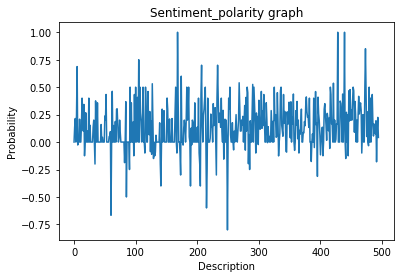

In [13]:
plt.plot(sharkdata['Sentiment_polarity'])

plt.xlabel('Description')
plt.ylabel('Probability')
plt.title('Sentiment_polarity graph')
plt.axis()

Text(0.5, 1.0, 'word_count graph')

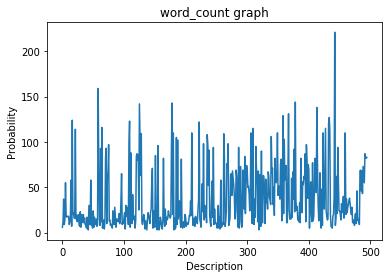

In [14]:
plt.plot(sharkdata['word_count'])

plt.xlabel('Description')
plt.ylabel('Probability')
plt.title('word_count graph')

Text(0.5, 1.0, 'word_density graph')

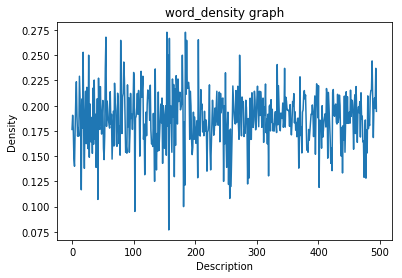

In [15]:
plt.plot(sharkdata['word_density'])

plt.xlabel('Description')
plt.ylabel('Density')
plt.title('word_density graph')

In [15]:
# from nltk.tokenize import sent_tokenize, word_tokenize
# corpus = []
# for i in range(0,len(sharkdata.index)):

#     desc=sharkdata['description'][i]

#     print(sent_tokenize(desc)) 

#     print(word_tokenize(desc))
#     ps = PorterStemmer()
#     desc = [ps.stem(word) for word in desc 
#                 if not word in set(stopwords.words('english'))]  

                  

#     # rejoin all string array elements 

#     # to create back into a string 

#     desc = ' '.join(desc)   

      

#     # append each string to create 

#     # array of clean text  

#     corpus.append(desc)  

#used “Description” column for the initial text mining exercise. TFIDF can also be used.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

def createDtm(docs):
    #docs = ['why hello there', 'omg hello pony', 'she went there? omg']
    vec = CountVectorizer()
    X = vec.fit_transform(docs)
    df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
    print(df)

In [18]:
createDtm(['Bluetooth device implant for your ear.'])


   bluetooth  device  ear  for  implant  your
0          1       1    1    1        1     1
Bluetooth device implant for your ear


In [23]:
sent_corpus = []
import re
import string
from nltk import punkt
from nltk.tokenize import sent_tokenize, word_tokenize

for i in range(0,len(sharkdata.index)):
    description = re.sub('[^a-zA-Z]',' ', sharkdata['description'][i]) 
#     print(description)
# #     description.translate(str.maketrans('', '', string.punctuation))
#     description = re.sub('[0-9]',' ', sharkdata['description'][i])
#     description_sen = re.sub('\%',' ', sharkdata['description'][i])
#      description_sen = re.sub('\/',' ', sharkdata['description'][i])
#     print(description_sen)
    
    description = description.lower()
    description = description.split() 
    ps = PorterStemmer()  
    description = [ps.stem(word) for word in description 
                if not word in set(stopwords.words('english'))]
    description = ' '.join(description)
    sent_corpus.append(description)
print(sent_corpus) 

['bluetooth devic implant ear', 'retail wholesal pie factori two retail locat new jersey', 'ava eleph godsend frazzl parent young children everywher talk medicin dispens make easi administ medicin littl one turn experi play provid posit reinforc', 'organ pack move servic deliv colleg women', 'interact media center healthcar wait room offer patient web access educ inform', 'one first entrepreneur pitch shark tank susan knapp present perfect pear line pear focus gourmet food product sold across retail store perfect pear product portfolio includ jam jelli spread tapenad vinegar marinad dress mani other design showcas flavor health benefit pear', 'mix martial art cloth line look becom next big brand activ sport streetwear apparel', 'attach note detach arm hold post note side laptop screen', 'safeti devic seatbelt prevent driver start vehicl unless seatbelt buckl', 'educ record label publish hous design get student learn classic work literatur', 'batteri oper cook devic siphon juic silicon 

In [31]:
for desc in sent_corpus:
    print(desc)

bluetooth devic implant ear.
retail wholesal pie factori two retail locat new jersey.
ava eleph godsend frazzl parent young children everywhere. talk medicin dispens make easi administ medicin littl one turn experi play provid posit reinforcement.
organizing, packing, move servic deliv colleg women.
interact media center healthcar wait room offer patient web access educ information.
one first entrepreneur pitch shark tank, susan knapp present perfect pear, line pear-focus gourmet food products. sold across 650 retail stores, perfect pear product portfolio includ jams, jellies, spreads, tapenades, vinegars, marinades, dress mani others, design showcas flavor health benefit pears.
mix martial art cloth line look becom next big brand activ sport streetwear apparel.
attach note detach "arm" hold post-it note side laptop screen.
safeti devic seatbelts. prevent driver start vehicl unless seatbelt buckled.
educ record label publish hous design get student learn classic work literature.
batter

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(sharkdata['description']).toarray()
final_features.shape

(495, 894)

In [24]:
createDtm(sent_corpus)

     ab  aback  abil  abl  abras  absorb  absorpt  acai  acceler  accent  ...  \
0     0      0     0    0      0       0        0     0        0       0  ...   
1     0      0     0    0      0       0        0     0        0       0  ...   
2     0      0     0    0      0       0        0     0        0       0  ...   
3     0      0     0    0      0       0        0     0        0       0  ...   
4     0      0     0    0      0       0        0     0        0       0  ...   
5     0      0     0    0      0       0        0     0        0       0  ...   
6     0      0     0    0      0       0        0     0        0       0  ...   
7     0      0     0    0      0       0        0     0        0       0  ...   
8     0      0     0    0      0       0        0     0        0       0  ...   
9     0      0     0    0      0       0        0     0        0       0  ...   
10    0      0     0    0      0       0        0     0        0       0  ...   
11    0      0     0    0   